In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [2]:
df = pd.read_csv("Churn_Modelling_Project Data.csv")
df.head(2)

,CreditScore,Gender,Age,Tenure (Yrs),Outstanding Amt,EstimatedSalary,Exited
0,557,Female,42,2,0.00,101348.88,1
1,719,Female,41,1,83807.86,112542.58,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure (Yrs)     10000 non-null  int64  
 4   Outstanding Amt  10000 non-null  float64
 5   EstimatedSalary  10000 non-null  float64
 6   Exited           10000 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 547.0+ KB


In [4]:
corr = df.drop(columns="Gender").corr()

<Axes: >

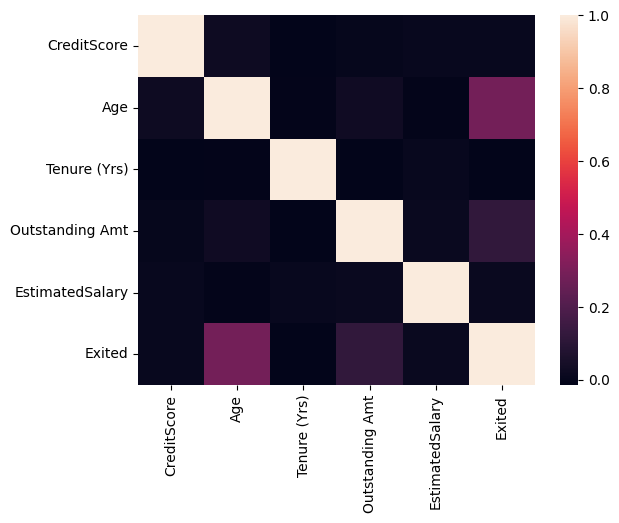

In [5]:

sns.heatmap(corr)

In [6]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [7]:
df.head()

,CreditScore,Gender,Age,Tenure (Yrs),Outstanding Amt,EstimatedSalary,Exited
0,557,0,42,2,0.00,101348.88,1
1,719,0,41,1,83807.86,112542.58,0
2,763,0,42,8,159660.80,113931.57,1
3,517,0,39,1,0.00,93826.63,0
4,771,0,43,2,125510.82,79084.10,0


In [8]:
df.describe()

,CreditScore,Gender,Age,Tenure (Yrs),Outstanding Amt,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,698.082600,0.545700,38.921800,5.012800,76485.889288,100090.239881,0.203700
std,116.161746,0.497932,10.487806,2.892174,62397.405202,57510.492818,0.402769
min,500.000000,0.000000,18.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,0.000000,32.000000,3.000000,0.000000,51002.110000,0.000000
50%,698.000000,1.000000,37.000000,5.000000,97198.540000,100193.915000,0.000000
75%,798.000000,1.000000,44.000000,7.000000,127644.240000,149388.247500,0.000000
max,900.000000,1.000000,92.000000,10.000000,250898.090000,199992.480000,1.000000


In [9]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df["Gender"].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [11]:
target = "Exited"
X = df.drop(columns=target)
y = df[target]

In [12]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)


(3288, 6)


In [15]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)


(12712, 6)


In [19]:
# building the nural network model
import keras

from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

classifier.add(Dense(units=6, kernel_initializer = "uniform", activation="relu", input_dim=6))
classifier.add(Dense(units=6, kernel_initializer = "uniform", activation="relu"))
classifier.add(Dense(units=1, kernel_initializer = "uniform", activation="sigmoid"))
classifier.compile(optimizer = "adam",loss = "binary_crossentropy", metrics=["accuracy"])
classifier.fit(X_train,y_train,batch_size=10,epochs=30)

Epoch 1/30


C:\Users\dastu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7879 - loss: 0.5673
Epoch 2/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8031 - loss: 0.4350
Epoch 3/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7961 - loss: 0.4415
Epoch 4/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7981 - loss: 0.4414
Epoch 5/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7982 - loss: 0.4458
Epoch 6/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8006 - loss: 0.4308
Epoch 7/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7892 - loss: 0.4485
Epoch 8/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7989 - loss: 0.4483
Epoch 9/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8064 - loss: 0.4323
Epoch 10/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8023 - loss: 0.4329
Epoch 11/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8050 - loss: 0.4335
Epoch 12/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

In [51]:
classifier_under = Sequential()

classifier_under.add(Dense(units=6, kernel_initializer = "uniform", activation="relu", input_dim=6))
classifier_under.add(Dense(units=6, kernel_initializer = "uniform", activation="relu"))
classifier_under.add(Dense(units=1, kernel_initializer = "uniform", activation="sigmoid"))
classifier_under.compile(optimizer = "adam",loss = "binary_crossentropy", metrics=["accuracy"])

classifier_under.fit(X_train_under,y_train_under,batch_size=10,epochs=30)

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5891 - loss: 0.6863
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7018 - loss: 0.6142
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7072 - loss: 0.5944
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7078 - loss: 0.5884
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6928 - loss: 0.5975
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7139 - loss: 0.5790
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7024 - loss: 0.5944
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7073 - loss: 0.5867
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6879 - loss: 0.6025
Epoch 10/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7164 - loss: 0.5796
Epoch 11/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6957 - loss: 0.5927
Epoch 12/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [52]:
classifier_over = Sequential()

classifier_over.add(Dense(units=6, kernel_initializer = "uniform", activation="relu", input_dim=6))
classifier_over.add(Dense(units=6, kernel_initializer = "uniform", activation="relu"))
classifier_over.add(Dense(units=1, kernel_initializer = "uniform", activation="sigmoid"))
classifier_over.compile(optimizer = "adam",loss = "binary_crossentropy", metrics=["accuracy"])
classifier_over.fit(X_train,y_train,batch_size=10,epochs=30)

Epoch 1/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7885 - loss: 0.5912
Epoch 2/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7912 - loss: 0.4454
Epoch 3/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7924 - loss: 0.4452
Epoch 4/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7901 - loss: 0.4368   
Epoch 5/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8081 - loss: 0.4249
Epoch 6/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8094 - loss: 0.4301
Epoch 7/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8038 - loss: 0.4389
Epoch 8/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8115 - loss: 0.4277
Epoch 9/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8094 - loss: 0.4331
Epoch 10/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8206 - loss: 0.4162
Epoch 11/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8115 - loss: 0.4308
Epoch 12/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/s

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy 0.815


<Axes: >

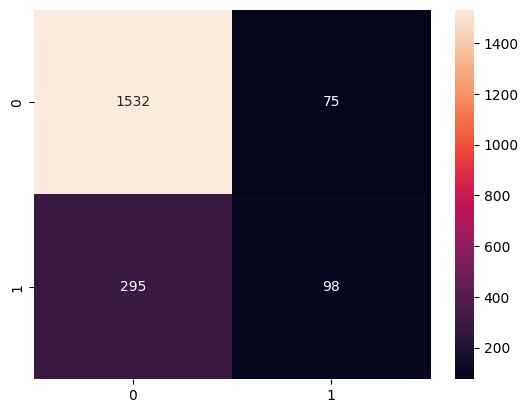

In [38]:
y_pred = classifier.predict(X_test)
y_pred= (y_pred>0.45)
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt="")

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy Score on Test Set:", accuracy)

# Precision Score
precision = precision_score(y_true, y_pred)
print("Precision Score on Test Set:", precision)

# Recall Score
recall = recall_score(y_true, y_pred)
print("Recall Score on Test Set:", recall)

# ROC AUC Score
# ROC AUC score is typically used for binary classification problems
# Make sure your y_true and y_pred are for binary classification
roc_auc = roc_auc_score(y_true, y_pred)
print("ROC AUC Score on Test Set:", roc_auc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy 0.708


<Axes: >

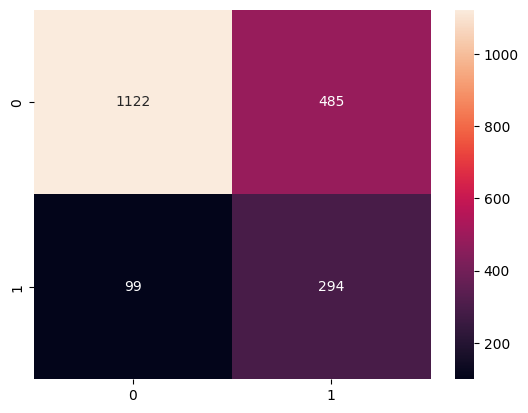

In [55]:
y_pred = classifier_under.predict(X_test)
y_pred= (y_pred>0.45)
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt="")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy 0.8145


<Axes: >

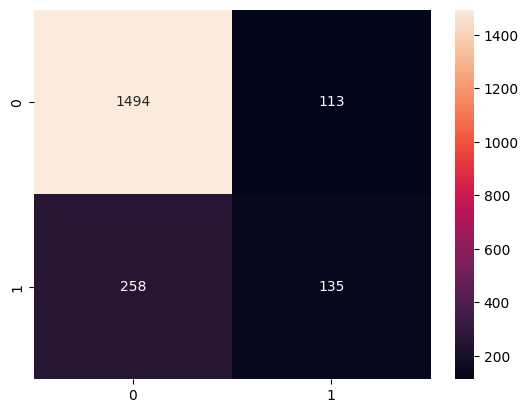

In [56]:
y_pred = classifier_over.predict(X_test)
y_pred= (y_pred>0.45)
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt="")

In [90]:
"""


MACHINE LEARNING 


"""

'\n\n\nMACHINE LEARNING \n\n\n'

In [20]:
model_ml = LogisticRegression(max_iter=3000)
model_ml.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [21]:
acc_train = accuracy_score(y_train,model_ml.predict(X_train))
acc_test = model_ml.score(X_test,y_test)

print("ml Training Accuracy:", acc_train)
print("ml Validation Accuracy:", acc_test)

ml Training Accuracy: 0.78375
ml Validation Accuracy: 0.7925


In [22]:
coefficients = model_ml.coef_

# Print coefficients for each feature
for i, coef in enumerate(coefficients[0]):
    print("Coefficient for feature {}: {:.4f}".format(i, coef))

Coefficient for feature 0: -0.0003
Coefficient for feature 1: -0.2720
Coefficient for feature 2: 0.6581
Coefficient for feature 3: -0.0252
Coefficient for feature 4: 0.3196
Coefficient for feature 5: 0.0258


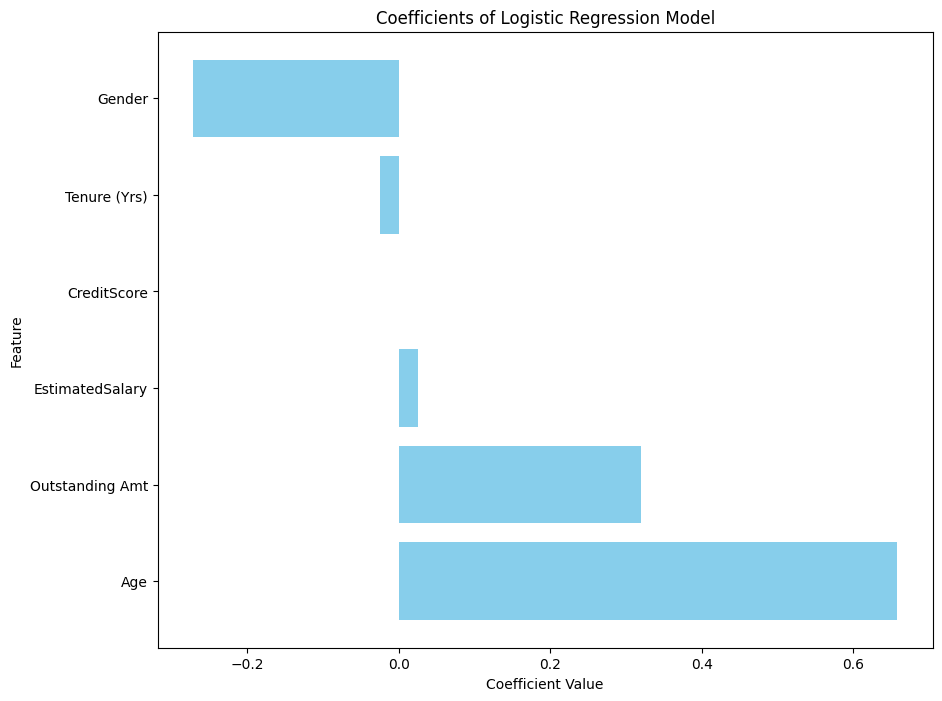

In [27]:
coefficients = model_ml.coef_[0]

# Extracting feature names
feature_names = df.columns[:-1]

# Creating a DataFrame to hold feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting coefficients in descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

In [28]:
y_pred = model_ml.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set:", accuracy)

# Precision Score
precision = precision_score(y_test, y_pred)
print("Precision Score on Test Set:", precision)

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall Score on Test Set:", recall)

# ROC AUC Score
# Note: ROC AUC score is only applicable for binary classification problems
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score on Test Set:", roc_auc)

Accuracy Score on Test Set: 0.7925
Precision Score on Test Set: 0.375
Recall Score on Test Set: 0.08396946564885496
ROC AUC Score on Test Set: 0.5248721005904511


In [29]:
model_ml_under = LogisticRegression(max_iter=3000)
model_ml_under.fit(X_train_under,y_train_under)

LogisticRegression(max_iter=3000)

In [30]:
acc_train_under = accuracy_score(y_train_under,model_ml_under.predict(X_train_under))
acc_test_under = model_ml_under.score(X_test,y_test)

print("ml_under Training Accuracy:", acc_train_under)
print("ml_under Validation Accuracy:", acc_test_under)

ml_under Training Accuracy: 0.6970802919708029
ml_under Validation Accuracy: 0.714


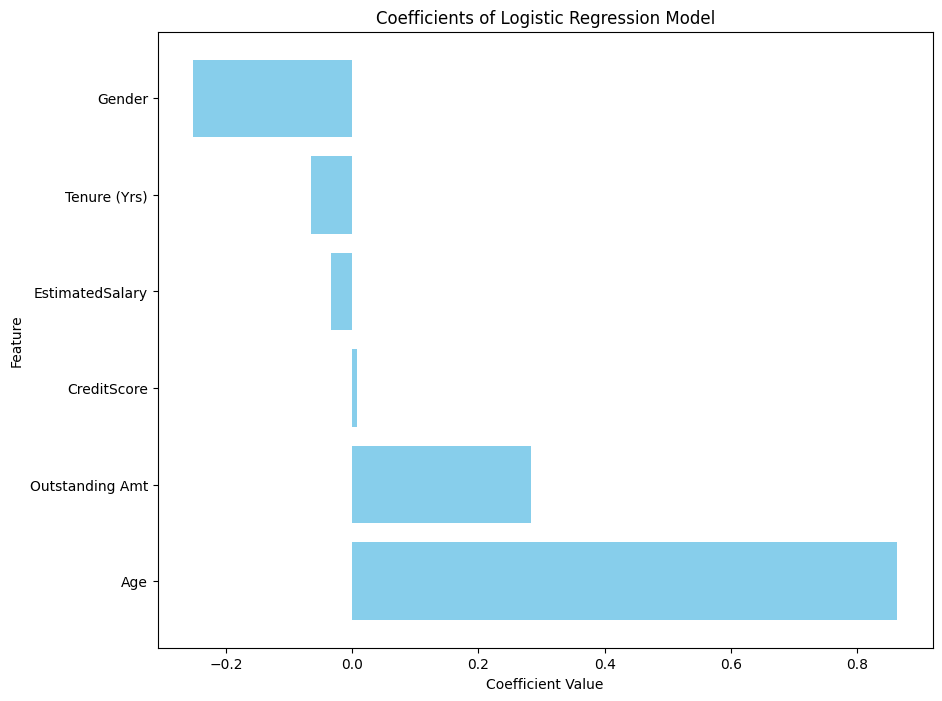

In [32]:
coefficients = model_ml_under.coef_[0]

# Extracting feature names
feature_names = df.columns[:-1]

# Creating a DataFrame to hold feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting coefficients in descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

In [33]:
y_pred = model_ml_under.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set:", accuracy)

# Precision Score
precision = precision_score(y_test, y_pred)
print("Precision Score on Test Set:", precision)

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall Score on Test Set:", recall)

# ROC AUC Score
# Note: ROC AUC score is only applicable for binary classification problems
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score on Test Set:", roc_auc)

Accuracy Score on Test Set: 0.714
Precision Score on Test Set: 0.37889039242219213
Recall Score on Test Set: 0.712468193384224
ROC AUC Score on Test Set: 0.713421402230382


In [34]:
model_ml_over = LogisticRegression(max_iter=3000)
model_ml_over.fit(X_train_over,y_train_over)

LogisticRegression(max_iter=3000)

In [35]:
acc_train_over = accuracy_score(y_train_over,model_ml_over.predict(X_train_over))
acc_test_over = model_ml_over.score(X_test,y_test)

print("ml_over Training Accuracy:", acc_train_over)
print("ml_over Validation Accuracy:", acc_test_over)

ml_over Training Accuracy: 0.6928886091881686
ml_over Validation Accuracy: 0.709


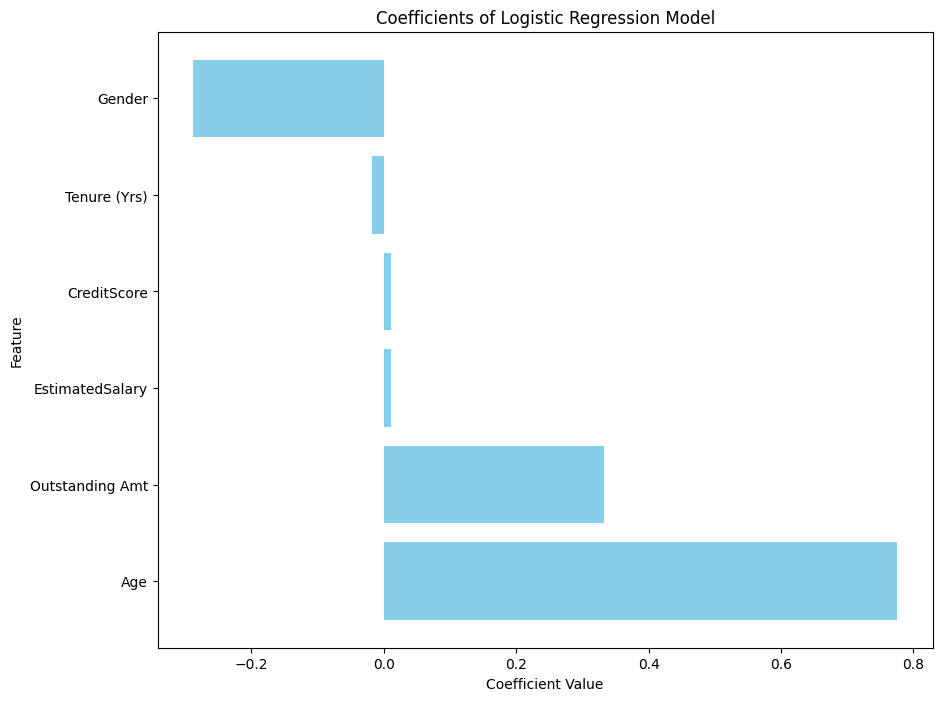

In [36]:
coefficients = model_ml_over.coef_[0]

# Extracting feature names
feature_names = df.columns[:-1]

# Creating a DataFrame to hold feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting coefficients in descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

In [37]:
y_pred = model_ml_over.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set:", accuracy)

# Precision Score
precision = precision_score(y_test, y_pred)
print("Precision Score on Test Set:", precision)

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall Score on Test Set:", recall)

# ROC AUC Score
# Note: ROC AUC score is only applicable for binary classification problems
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score on Test Set:", roc_auc)

Accuracy Score on Test Set: 0.709
Precision Score on Test Set: 0.3745019920318725
Recall Score on Test Set: 0.7175572519083969
ROC AUC Score on Test Set: 0.7122322662777827


In [93]:
"""

ANN model with the oversampled data has the highest accuracy among all  (marginally better than the ANN model with the original dataset)

"""

'\n\nANN model with the oversampled data has the highest accuracy among all  (marginally better than the ANN model with the original dataset)\n\n'